In [1]:
%matplotlib ipympl
import edfio
from edfio import read_edf
from datetime import datetime, date, time, timedelta
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Path to your EDF file
edf_file_path = r"C:\Users\jmile3\OneDrive - SCH\Cadwell\testEDF_anon.edf"

# Load the header information
edf = read_edf(edf_file_path, lazy_load_data=True)


In [3]:
try:
    start_date = edf.startdate
except:
    start_date = date(1, 1, 1)
start_time = datetime.combine(start_date,edf.starttime)
end_time = start_time+timedelta(seconds=edf.duration)
print(start_time.strftime('%H:%M:%S'))
print(end_time.strftime('%H:%M:%S'))

00:00:00
00:44:51


In [4]:
# for *all* signals, entire duration
# data = edf.slice_between_seconds(0.0,np.ceil(edf.duration))

In [5]:
keep_chs = 0
all_chs = np.arange(len(edf.signals))
drop_chs = np.setdiff1d(all_chs,keep_chs)
edf.drop_signals(drop_chs)
testdur = 1.0
sfreq = edf.signals[0].sampling_frequency
testslice = edf.signals[0].get_data_slice(0.0,testdur)
testts = np.linspace(1/sfreq,testdur,len(testslice))


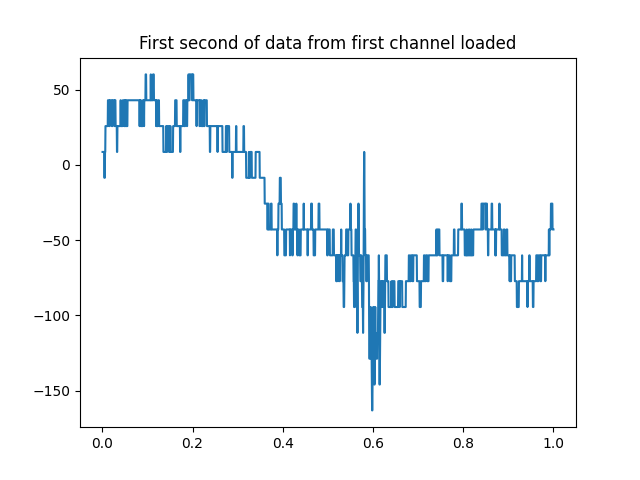

In [7]:
plt.clf()
plt.plot(testts,testslice)
plt.title('First second of data from first channel loaded')
plt.show()
